# TP3 Reconnaissance d’écriture par réseaux de neurones

## 1. Analyse des données

#### a) Charger la base de données digits disponible sous sklearn.

<Figure size 432x288 with 0 Axes>

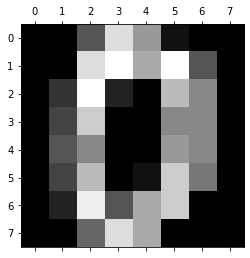

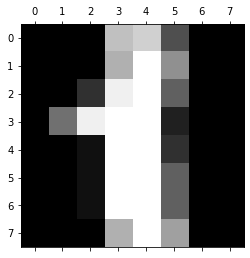

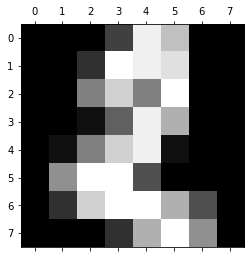

(1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted 

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt
plt.gray()
for index in range(0,3):
    plt.matshow(digits.images[index]) #index est le numéro de l’image
plt.show()

X = digits.data
y = digits.target

print(X.shape)
print(digits['DESCR'])


#### b) Séparer une fois pour toutes la base initiale en deux : apprentissage (70%) et test (30%) 

In [2]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.3, random_state=42)

## 2. Apprentissage

C =  2
le taux de reconnaissance sur les bases d’apprentissage :  [0.4017501988862371, 0.4033412887828162, 0.40652346857597454]
le taux de reconnaissance sur les bases de test :  [0.3648148148148148, 0.3425925925925926, 0.3685185185185185]


la moyenne de taux en apprentissage :  0.403871652081676
l'écrat type de taux en apprentissage 0.0024304299628511443


la moyenne de taux en test :  0.358641975308642
l'écrat type de taux en test 0.014021995915556218


C =  5
le taux de reconnaissance sur les bases d’apprentissage :  [0.3929992044550517, 0.38027048528241847, 0.9148766905330151]
le taux de reconnaissance sur les bases de test :  [0.3592592592592593, 0.37592592592592594, 0.8888888888888888]


la moyenne de taux en apprentissage :  0.5627154600901618
l'écrat type de taux en apprentissage 0.3050469705524254


la moyenne de taux en test :  0.541358024691358
l'écrat type de taux en test 0.30108590239640315


C =  8
le taux de reconnaissance sur les bases d’apprentissage :  [0.66507557677

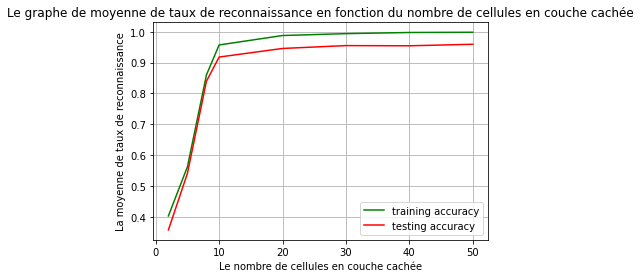

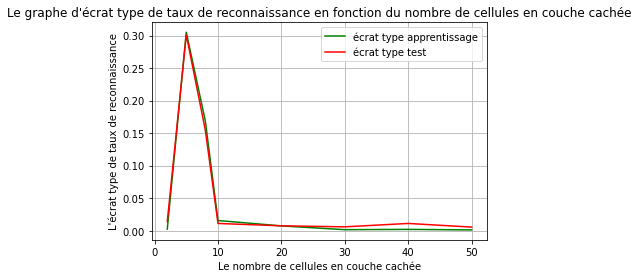

In [3]:
from sklearn.neural_network import MLPClassifier
import numpy as np

import warnings
warnings.filterwarnings("ignore")

C_value = []
mean_apprentissage = []
mean_test = []
std_apprentissage = []
std_test = []

def multi_couche(C):
    taux_reconnaissance_apprentissage = []
    taux_reconnaissance_test = []
    
    for i in range(1,4):
        clf1 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', 
                             batch_size=1, alpha=0, learning_rate='adaptive')
        clf1.fit(X_train, y_train)
        taux_reconnaissance_apprentissage.append(clf1.score(X_train, y_train))
        taux_reconnaissance_test.append(clf1.score(X_test, y_test))
    print("C = ", C)
    print("le taux de reconnaissance sur les bases d’apprentissage : ", taux_reconnaissance_apprentissage)
    print("le taux de reconnaissance sur les bases de test : ", taux_reconnaissance_test)
    print("\n")
    print("la moyenne de taux en apprentissage : ", np.mean(taux_reconnaissance_apprentissage))
    print("l'écrat type de taux en apprentissage", np.std(taux_reconnaissance_apprentissage,ddof=1))
    print("\n")
    print("la moyenne de taux en test : ", np.mean(taux_reconnaissance_test))
    print("l'écrat type de taux en test", np.std(taux_reconnaissance_test,ddof=1))
    print("\n")
    C_value.append(C)
    mean_apprentissage.append(np.mean(taux_reconnaissance_apprentissage))
    mean_test.append(np.mean(taux_reconnaissance_test))
    std_apprentissage.append(np.std(taux_reconnaissance_apprentissage,ddof=1))
    std_test.append(np.std(taux_reconnaissance_test,ddof=1))
    
multi_couche(2)
multi_couche(5)
multi_couche(8)
multi_couche(10)
multi_couche(20)
multi_couche(30)
multi_couche(40)
multi_couche(50)
#multi_couche(20)
#multi_couche(30)
#multi_couche(50)
#multi_couche(100)

from matplotlib import pyplot
pyplot.plot(C_value, mean_apprentissage, color='green', label='training accuracy')
pyplot.plot(C_value, mean_test , color='red', label='testing accuracy')
pyplot.legend()
pyplot.xlabel('Le nombre de cellules en couche cachée')
pyplot.ylabel('La moyenne de taux de reconnaissance')
pyplot.title("Le graphe de moyenne de taux de reconnaissance en fonction du nombre de cellules en couche cachée")
pyplot.grid()
pyplot.show()


pyplot.plot(C_value, std_apprentissage, color='green', label='écrat type apprentissage')
pyplot.plot(C_value, std_test, color='red', label='écrat type test')
pyplot.legend()
pyplot.xlabel('Le nombre de cellules en couche cachée')
pyplot.ylabel("L'écrat type de taux de reconnaissance")
pyplot.title("Le graphe d'écrat type de taux de reconnaissance en fonction du nombre de cellules en couche cachée")
pyplot.grid()
pyplot.show()

## 3 Cross-validation

In [3]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.3, random_state=42)
X_train1,X_val,y_train1,y_val = model_selection.train_test_split(X_train,y_train,train_size=0.8, random_state=42)

from sklearn.neural_network import MLPClassifier
import numpy as np

taux_reconnaissance_app = []
taux_reconnaissance_val = []

for i in range (0, 10):
    clf2 = MLPClassifier(hidden_layer_sizes = 20, activation='tanh', solver='sgd', 
                     batch_size=1, alpha=0, learning_rate='adaptive', early_stopping = True, validation_fraction = 0.2)
    clf2.fit(X_train1, y_train1)
    taux_reconnaissance_app.append(clf2.score(X_train1, y_train1))
    taux_reconnaissance_val.append(clf2.score(X_val, y_val))
    
    
print("le taux de reconnaissance sur les bases d’apprentissage : ", taux_reconnaissance_app)
print("la moyenne de taux en apprentissage : ", np.mean(taux_reconnaissance_app))
print("l'écrat type de taux en apprentissage", np.std(taux_reconnaissance_app,ddof=1))
print("\n")
print("le taux de reconnaissance sur les bases de validation : ", taux_reconnaissance_val)
print("la moyenne de taux en validation : ", np.mean(taux_reconnaissance_val))
print("l'écrat type de taux en validation", np.std(taux_reconnaissance_val,ddof=1))



le taux de reconnaissance sur les bases d’apprentissage :  [0.9442786069651742, 0.945273631840796, 0.9293532338308458, 0.9253731343283582, 0.9641791044776119, 0.9691542288557214, 0.9592039800995025, 0.900497512437811, 0.9243781094527364, 0.8258706467661692]
la moyenne de taux en apprentissage :  0.9287562189054727
l'écrat type de taux en apprentissage 0.04182314700576484


le taux de reconnaissance sur les bases de validation :  [0.9087301587301587, 0.8968253968253969, 0.9007936507936508, 0.8888888888888888, 0.9325396825396826, 0.9087301587301587, 0.9126984126984127, 0.8412698412698413, 0.9087301587301587, 0.7976190476190477]
la moyenne de taux en validation :  0.8896825396825395
l'écrat type de taux en validation 0.04006866813789455


In [4]:
from sklearn import metrics
y_pred_test= clf2.predict(X_test)
metrics.confusion_matrix(y_test, y_pred_test)

print("La matrice de confusion : \n", metrics.confusion_matrix(y_test, y_pred_test))

La matrice de confusion : 
 [[51  0  1  0  0  0  1  0  0  0]
 [ 0 43  1  0  0  1  0  1  4  0]
 [ 0  2 43  1  0  0  1  0  0  0]
 [ 0  0 14 33  0  1  0  0  1  5]
 [ 0  4  0  0 50  1  2  3  0  0]
 [ 0  2  1  0  0 58  0  1  1  3]
 [ 2  0  0  0  0  3 48  0  0  0]
 [ 0  0  0  0  2  4  0 48  1  0]
 [ 0  1  5  2  0  4  1  0 28  2]
 [ 0  0  0  8  0 12  0  1  1 37]]


k optimal pour taux de reconnaissance max en validation 1


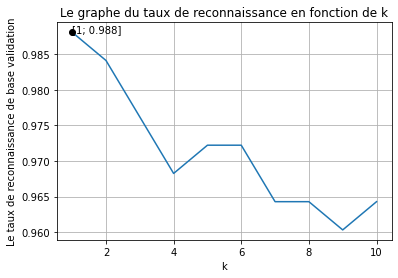

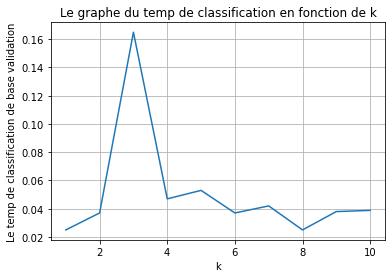

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
import time
k_range = range (1, 11)
taux_de_reconnaissance = []
temp_de_classification = []

for k in k_range:
    start = time.time()
    knn= KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train1, y_train1)
    end = time.time()
    temp_de_classification.append(end-start)
    score = knn.score(X_val, y_val)
    taux_de_reconnaissance.append(score)

pyplot.plot(k_range, taux_de_reconnaissance)

taux_max=np.argmax(taux_de_reconnaissance)
print("k optimal pour taux de reconnaissance max en validation",taux_max + 1)
show_max='['+str(taux_max + 1)+'; '+str(taux_de_reconnaissance[taux_max].round(3))+']'

pyplot.plot(taux_max + 1,taux_de_reconnaissance[taux_max],'ko') 
pyplot.annotate(show_max,xy=(taux_max + 1,taux_de_reconnaissance[taux_max]),xytext=(taux_max + 1, taux_de_reconnaissance[taux_max]))

pyplot.xlabel('k')
pyplot.ylabel('Le taux de reconnaissance de base validation')
pyplot.title("Le graphe du taux de reconnaissance en fonction de k")
pyplot.grid()
pyplot.show()

pyplot.plot(k_range, temp_de_classification)
pyplot.xlabel('k')
pyplot.ylabel('Le temp de classification de base validation')
pyplot.title("Le graphe du temp de classification en fonction de k")
pyplot.grid()
pyplot.show()

# 4. Rejet

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Le meilleur rapport se trouve en rejet  d’ambigüité :  512.0
threshold =  0.06


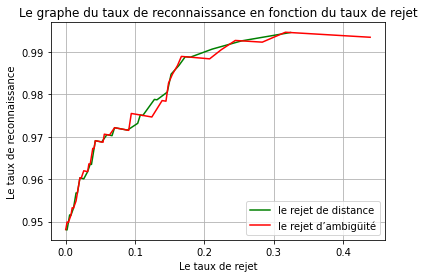

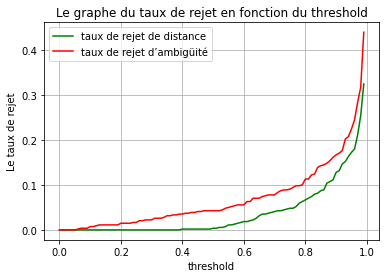

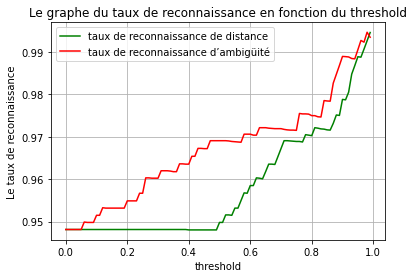

In [6]:
import numpy as np
from sklearn.neural_network import MLPClassifier

def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)


def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)

from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.3, random_state=123)
clf2 = MLPClassifier(hidden_layer_sizes = 20, activation='tanh', solver='sgd', 
                     batch_size=1, alpha=0, learning_rate='adaptive')
clf2.fit(X_train, y_train)
proba = clf2.predict_proba(X_test)

# Initialisation des variables
exemple_total = y_test.size
threshold = 0

exemple_rejet_dis = 0
exemple_bien_classe_dis = 0
exemple_classe_dis = 0
taux_rejet_dis = []
taux_reconnaissance_dis = []
rapport_dis = []

exemple_rejet_amb = 0
exemple_bien_classe_amb = 0
exemple_classe_amb = 0
taux_rejet_amb = []
taux_reconnaissance_amb = []
rapport_amb = []

threshold_tab = []


while threshold <= 1:
    
    result1 = argmax_reject_threshold(proba, threshold)

    for i in range(0, result1.size):
        if(result1[i] == -1):  # à chaque fois qu'il y a un rejet, le nombre de rejet distance s'incremente
            exemple_rejet_dis += 1

    taux_rejet_dis.append(exemple_rejet_dis/exemple_total)  # on calcule le taux de rejet distance 
    exemple_classe_dis = exemple_total - exemple_rejet_dis  # on calcule le nombre d'exemple classé distance 
    for j in range(0, result1.size):
        if(result1[j] == y_test[j]):  # à chaque fois on vérifie un élément par élément, le nombre des exemples bien classés distance s'incremente
            exemple_bien_classe_dis += 1
    if(exemple_classe_dis == 0):
        taux_reconnaissance_dis.append(1)
    else:
        taux_reconnaissance_dis.append(exemple_bien_classe_dis/exemple_classe_dis)  # On calcule le taux de reconnaissance distance
    
    if (exemple_rejet_dis == 0):
        rapport_dis.append(1)
    else:
        rapport_dis.append(exemple_bien_classe_dis/exemple_rejet_dis)   # On calcule le rapport de rejet de distance pour chaque threshold


    result2 = argmax_top2_reject_threshold(proba, threshold)
    
    
    for i in range(0, result2.size):
        if(result2[i] == -1):  # à chaque fois qu'il y a un rejet, le nombre de rejet ambigüité s'incremente
            exemple_rejet_amb += 1

    taux_rejet_amb.append(exemple_rejet_amb/exemple_total)  # on calcule le taux de rejet ambigüité 
    exemple_classe_amb = exemple_total - exemple_rejet_amb  # on calcule le nombre d'exemple classé ambigüité 
    for j in range(0, result2.size):
        if(result2[j] == y_test[j]):   # à chaque fois on vérifie un élément par élément, le nombre des exemples bien classés ambigüité s'incremente
            exemple_bien_classe_amb += 1
    if(exemple_classe_amb == 0):
        taux_reconnaissance_amb.append(1)
    else:
        taux_reconnaissance_amb.append(exemple_bien_classe_amb/exemple_classe_amb)  # On calcule le taux de reconnaissance ambigüité
    
    if(exemple_rejet_amb == 0):
        rapport_amb.append(1)
    else:
        rapport_amb.append(exemple_bien_classe_amb/exemple_rejet_amb)  # On calcule le rapport de rejet de ambigüité pour chaque threshold
    
    threshold_tab.append(threshold)
    
    # remet à 0 
    exemple_rejet_dis = 0
    exemple_bien_classe_dis = 0
    exemple_classe_dis = 0
    exemple_rejet_amb = 0
    exemple_bien_classe_amb = 0
    exemple_classe_amb = 0
    
    # on s'incremente threshold à la fin de la boucle while
    threshold += 0.01

# on calcule le meilleur rapport de rejet de distance
val_max_dis = max(rapport_dis)
maxindex_dis = rapport_dis.index(max(rapport_dis))

# on calcule le meilleur rapport de rejet d'ambigüité
val_max_amb = max(rapport_amb)
maxindex_amb = rapport_amb.index(max(rapport_amb))

# on compare et on affiche le meilleur rapport, la meilleur méthode de rejet et threshold correspond
if(val_max_dis > val_max_amb):
    print("Le meilleur rapport se trouve en rejet de distance : ", val_max_dis)
    print("threshold = ", maxindex_dis*0.01)
else:
    print("Le meilleur rapport se trouve en rejet  d’ambigüité : ", val_max_amb)
    print("threshold = ", maxindex_amb*0.01)

from matplotlib import pyplot

pyplot.plot(taux_rejet_dis, taux_reconnaissance_dis, color='green', label='le rejet de distance')
pyplot.plot(taux_rejet_amb, taux_reconnaissance_amb, color='red', label='le rejet d’ambigüité')
pyplot.legend()
pyplot.xlabel('Le taux de rejet')
pyplot.ylabel('Le taux de reconnaissance')
pyplot.title("Le graphe du taux de reconnaissance en fonction du taux de rejet")
pyplot.grid()
pyplot.show()

pyplot.plot(threshold_tab, taux_rejet_dis, color='green', label='taux de rejet de distance')
pyplot.plot(threshold_tab, taux_rejet_amb, color='red', label='taux de rejet d’ambigüité')
pyplot.legend()
pyplot.xlabel('threshold')
pyplot.ylabel('Le taux de rejet')
pyplot.title("Le graphe du taux de rejet en fonction du threshold")
pyplot.grid()
pyplot.show()

pyplot.plot(threshold_tab, taux_reconnaissance_dis, color='green', label='taux de reconnaissance de distance')
pyplot.plot(threshold_tab, taux_reconnaissance_amb, color='red', label='taux de reconnaissance d’ambigüité')
pyplot.legend()
pyplot.xlabel('threshold')
pyplot.ylabel('Le taux de reconnaissance')
pyplot.title("Le graphe du taux de reconnaissance en fonction du threshold")
pyplot.grid()
pyplot.show()
